<a href="https://colab.research.google.com/github/MiteshBhanushali/TelecomChurnAnalysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [178]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [179]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
#loading dataset
path='/content/drive/My Drive/Telecom Churn analysis/Copy of Telecom Churn.csv'
telecom_data=pd.read_csv(path)

Exploring Data

In [181]:
#View and overview of data
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [182]:
telecom_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [183]:
telecom_data.shape

(3333, 20)

In [184]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [185]:
telecom_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [186]:
colname_list=telecom_data.columns[(telecom_data.dtypes=='object')].tolist()
colname_list_num=telecom_data.columns[(telecom_data.dtypes!='object')].tolist()
colname_list_num.remove('Churn')
print(colname_list)
print(colname_list_num)

['State', 'International plan', 'Voice mail plan']
['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


Checking Missing Values In data and outliers 

In [187]:
telecom_data.isnull().sum() #No missing value in data set

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

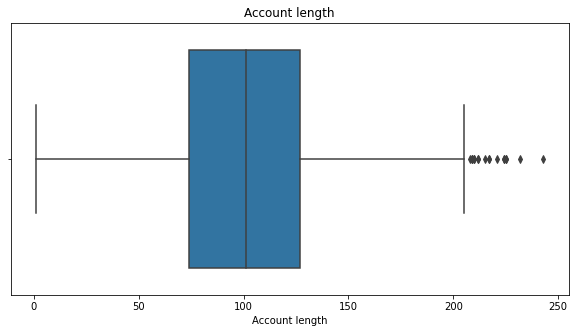

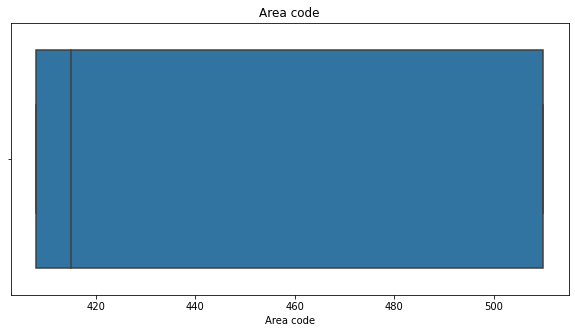

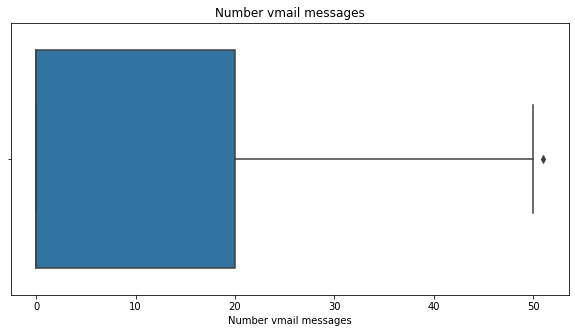

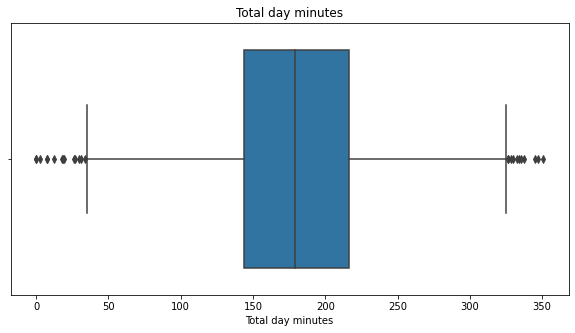

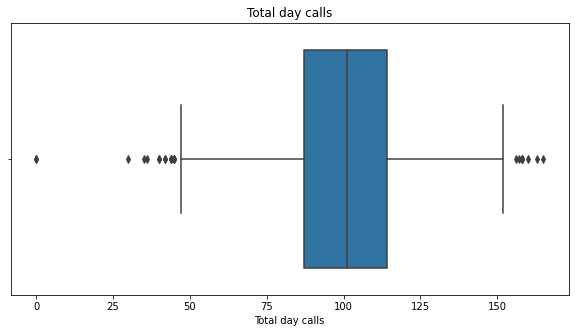

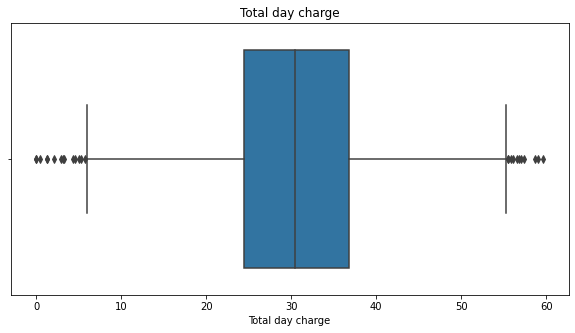

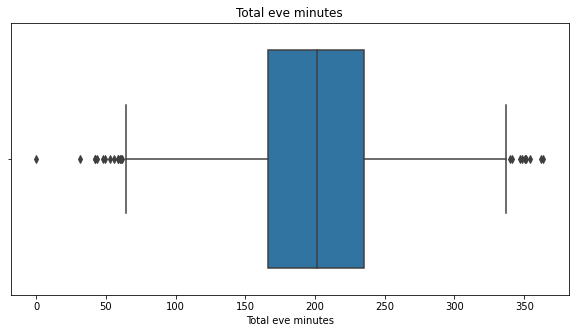

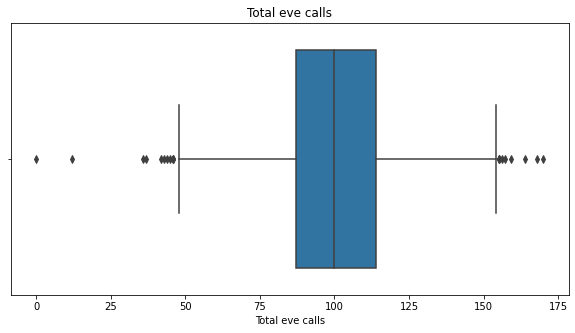

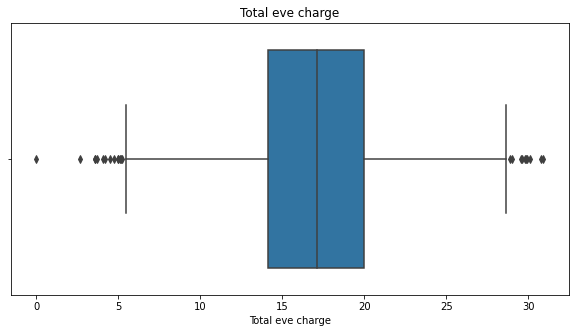

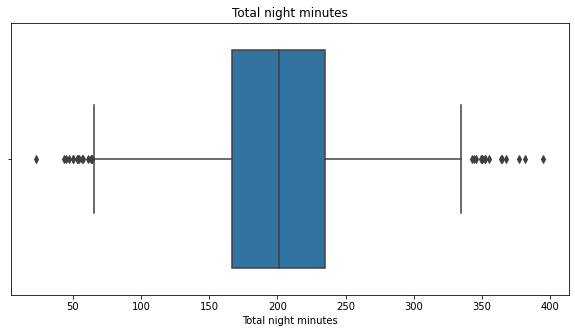

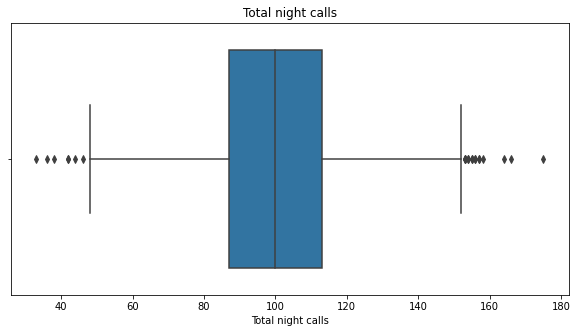

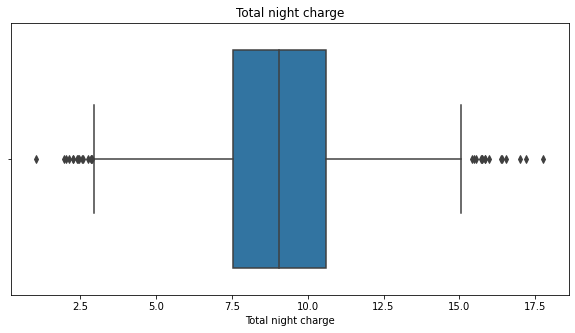

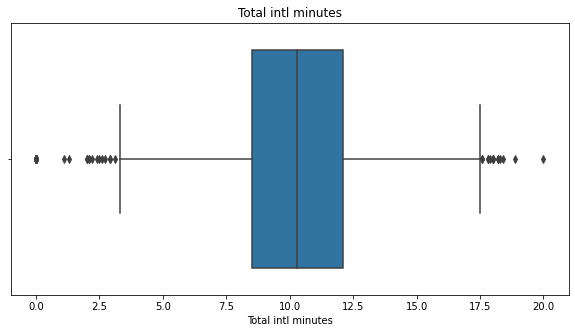

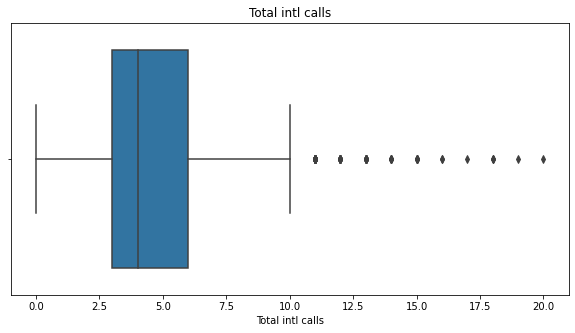

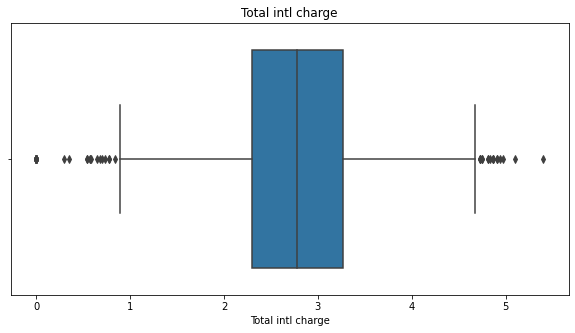

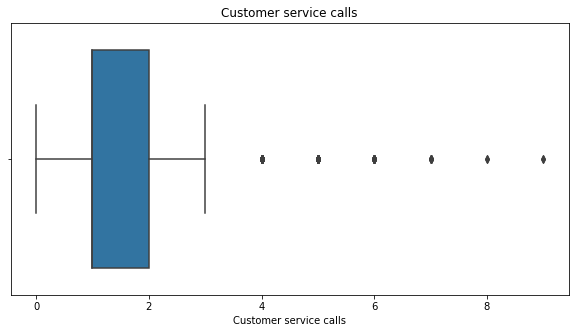

In [188]:
for i in colname_list_num:
  plt.figure(figsize=(10,5))
  sns.boxplot(telecom_data[i])
  plt.title(i)


In [189]:
#calculating min and max for outlier treatment
for i in colname_list_num:
  quater1=np.percentile(telecom_data[i],25)
  quater4=np.percentile(telecom_data[i],75)
  iqr=quater4-quater1
  lower_bound=quater1-(iqr*1.5)
  upper_bound=quater4+(iqr*1.5)
  #Changing outliers with mean
  telecom_data.loc[telecom_data.loc[:,i]<lower_bound,i]=telecom_data[i].mean()
  telecom_data.loc[telecom_data.loc[:,i]>upper_bound,i]=telecom_data[i].mean()

In [190]:
#changing data type of customer service calls
telecom_data['Customer service calls']=telecom_data['Customer service calls'].astype('int64')
telecom_data['Customer service calls'].dtype

dtype('int64')

Visualizing Data

In [191]:
#creating a correlation matrix to understand the relation between final column ("Churn") with all other column in dataset
correlation_df=telecom_data.corr()
correlation_df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.018295,0.000283,0.003867,0.035531,0.003863,-0.007371,0.023653,-0.007358,-0.012654,-0.007255,-0.012659,0.027950,0.030820,0.027608,-0.011943,0.011068
Area code,-0.018295,1.000000,-0.001504,-0.011620,-0.009076,-0.011621,-0.000193,-0.011795,-0.000166,-0.006391,0.008894,-0.006412,-0.018754,-0.010595,-0.019510,0.034992,0.006174
Number vmail messages,0.000283,-0.001504,1.000000,0.006812,-0.009484,0.006811,0.012035,-0.009565,0.012052,0.003515,0.010103,0.003499,-0.000809,-0.000019,-0.000157,-0.022671,-0.089473
Total day minutes,0.003867,-0.011620,0.006812,1.000000,0.017945,1.000000,0.007943,0.015668,0.007928,-0.004673,0.016867,-0.004699,-0.013720,-0.006831,-0.012235,-0.001134,0.186070
Total day calls,0.035531,-0.009076,-0.009484,0.017945,1.000000,0.017949,-0.023560,0.022951,-0.023556,0.025168,-0.013448,0.025159,0.013883,-0.007729,0.014138,-0.030541,0.025066
Total day charge,0.003863,-0.011621,0.006811,1.000000,0.017949,1.000000,0.007949,0.015668,0.007934,-0.004673,0.016869,-0.004699,-0.013721,-0.006831,-0.012235,-0.001141,0.186069
Total eve minutes,-0.007371,-0.000193,0.012035,0.007943,-0.023560,0.007949,1.000000,-0.022559,1.000000,-0.018990,0.001045,-0.019016,-0.017555,0.019515,-0.018240,-0.024946,0.081391
Total eve calls,0.023653,-0.011795,-0.009565,0.015668,0.022951,0.015668,-0.022559,1.000000,-0.022558,0.009009,0.002575,0.009048,0.003453,0.007678,0.002866,-0.015053,0.002872
Total eve charge,-0.007358,-0.000166,0.012052,0.007928,-0.023556,0.007934,1.000000,-0.022558,1.000000,-0.018998,0.001053,-0.019024,-0.017562,0.019518,-0.018246,-0.024946,0.081382
Total night minutes,-0.012654,-0.006391,0.003515,-0.004673,0.025168,-0.004673,-0.018990,0.009009,-0.018998,1.000000,0.004795,0.999999,-0.008811,0.015708,-0.006785,-0.003558,0.037448


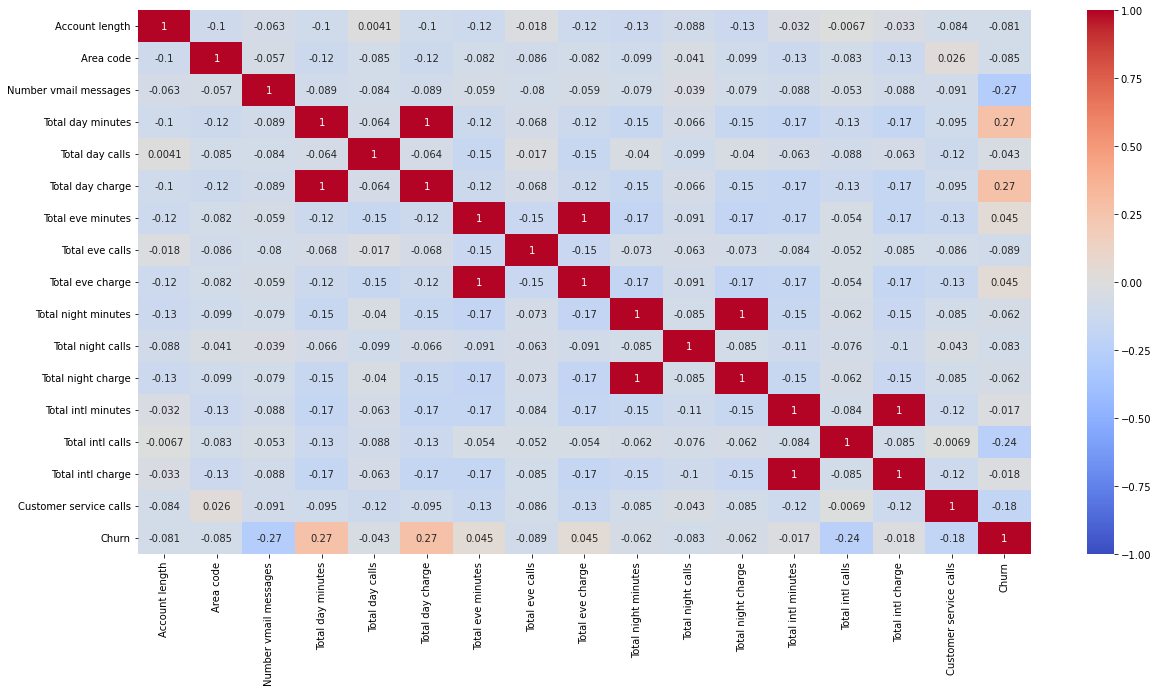

In [192]:
#Plotting the above correlatiion dataframe in a heat map
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'Distribution of churn column')

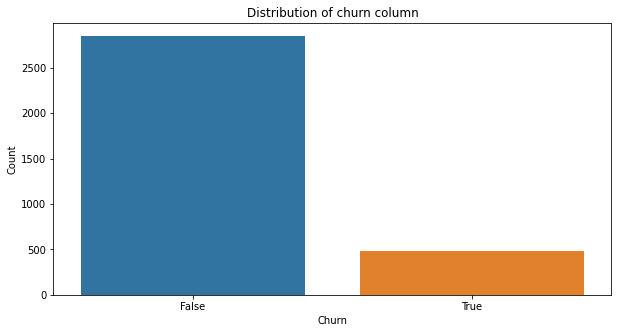

In [193]:
#Checking the Churn column distribution over given data set
plt.figure(figsize=(10,5))
sns.countplot(x=telecom_data.Churn)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of churn column")
#We can see that the data is not properly distributed we have more number of "False" than "True" in our dataset

We can see that the data is not properly distributed we have more number of "False" than "True" in our dataset

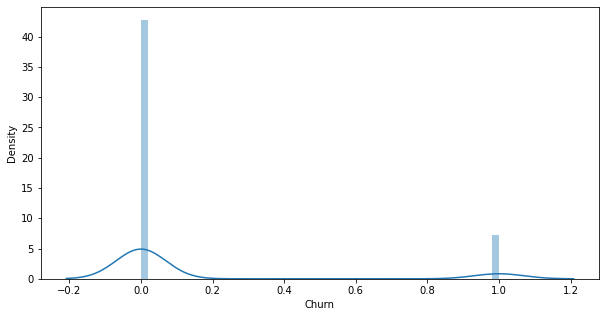

In [194]:
plt.figure(figsize=(10,5))
sns.distplot(telecom_data["Churn"],hist=True)

In [195]:
telecom_data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [196]:
#telecom_data.groupby(["State","Churn"])["Churn"].count().unstack().plot(kind='bar')

#Creating function to plot graph with target variabel
def bar_plot(x,y):
  telecom_data.groupby([x,y])[y].count().unstack().plot(kind='bar',figsize=(20,8))
  plt.xlabel(x,fontsize=20)
  plt.ylabel("Count",fontsize=20)
  plt.title(x+" vs "+y,fontsize=40)


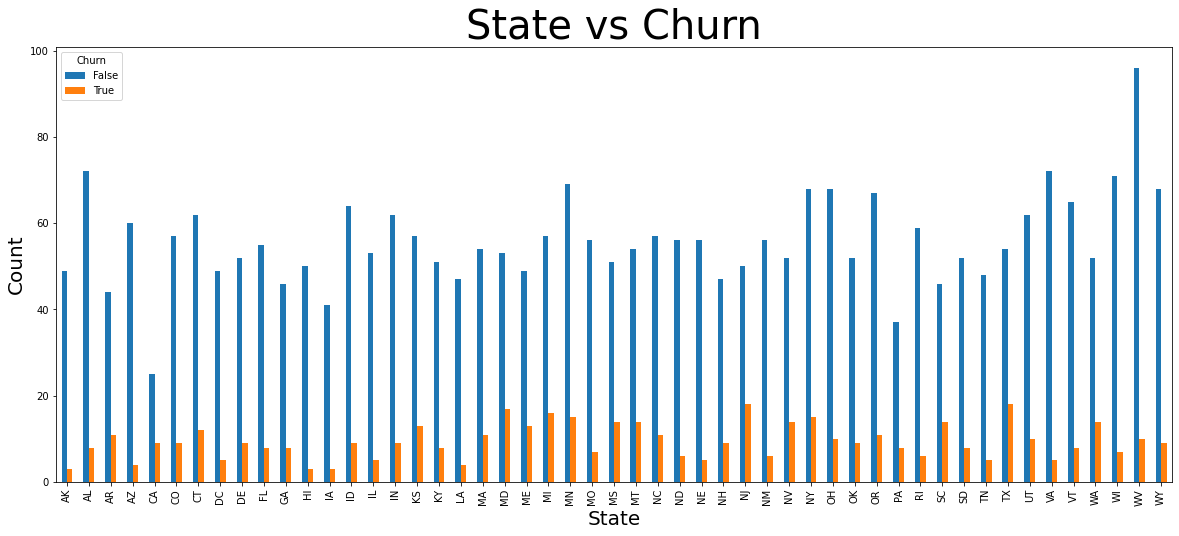

In [197]:
#State Vs Churn
bar_plot('State','Churn')

In [198]:
retained_cust=telecom_data.groupby(["State","Churn"])["Churn"].count().unstack().sort_values(False)
notretained_cust=telecom_data.groupby(["State","Churn"])["Churn"].count().unstack().sort_values(True)
print(f"State that has highest number of customer not canceled the subscription is :{retained_cust.iloc[-1,:].name}")
print(f"State that has highest number of customer canceled the subscription is :{notretained_cust.iloc[-1,:].name}")

State that has highest number of customer not canceled the subscription is :WV
State that has highest number of customer canceled the subscription is :TX


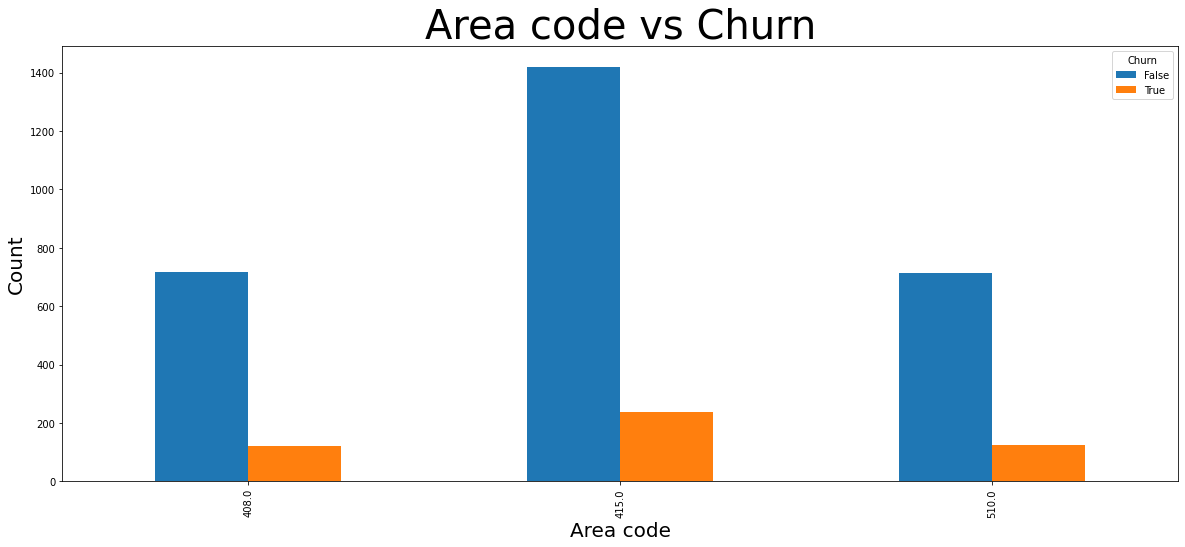

In [199]:
bar_plot('Area code','Churn')

###Area code 415 has the higest numbers of customer

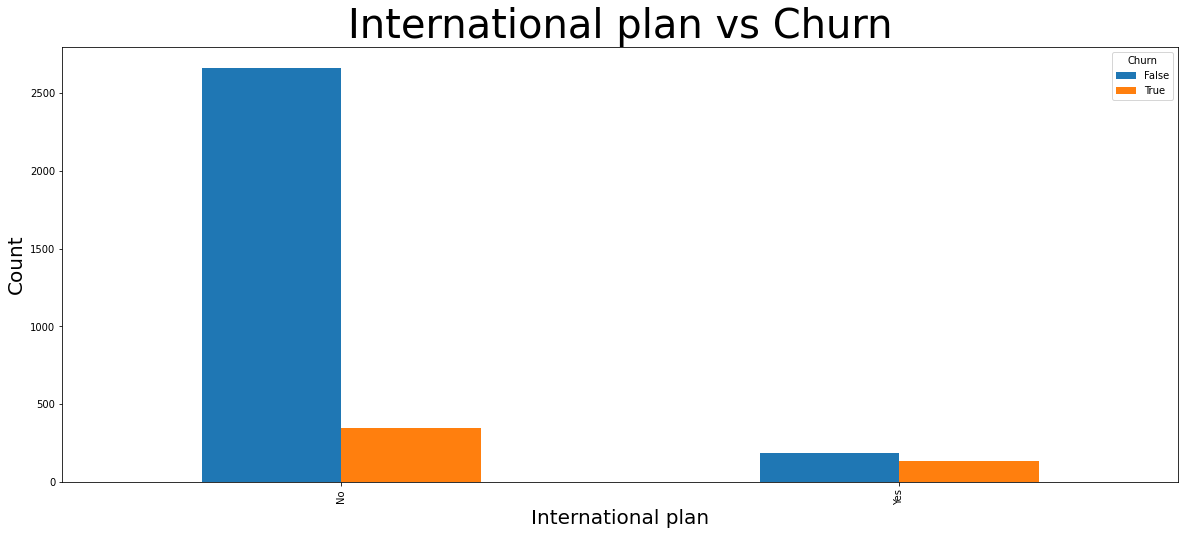

In [200]:
bar_plot('International plan','Churn')

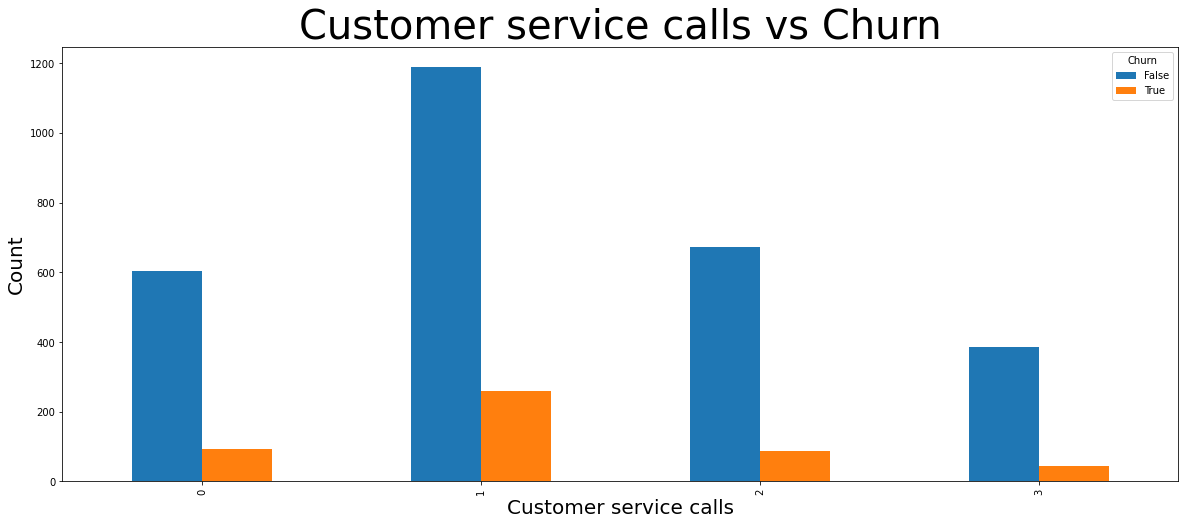

In [201]:
bar_plot('Customer service calls','Churn')

### If customer is calling for first time for service it has high change of customer will cancele the subscription or not based on the service given to customer

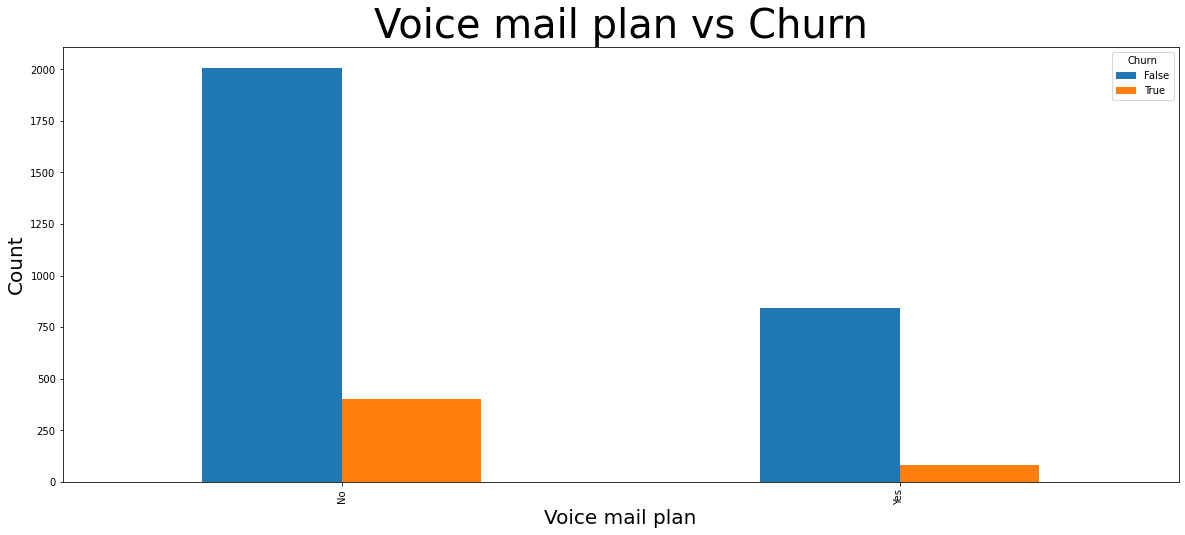

In [202]:
bar_plot('Voice mail plan','Churn')

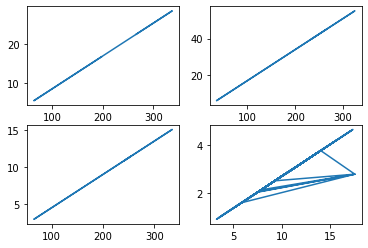

In [231]:
#line graph
figure, axis=plt.subplots(2,2)
axis[0,0].plot(telecom_data['Total eve minutes'],telecom_data['Total eve charge'])
axis[0,1].plot(telecom_data['Total day minutes'],telecom_data['Total day charge'])
axis[1,0].plot(telecom_data['Total night minutes'],telecom_data['Total night charge'])
axis[1,1].plot(telecom_data['Total intl minutes'],telecom_data['Total intl charge'])


Bi Variant analysis:

In [292]:
#telecom_data.groupby(['Total night calls']).agg({'Total night charge':'mean','Churn':'count'})
# Creating function for Bi Variant analysis
def biv_plot(x,y):
  telecom_data.groupby([x]).agg({y:'mean','Churn':'count'}).plot(figsize=(10,5))
  plt.title(x+" " +y+" "+" Churn")
  plt.show()

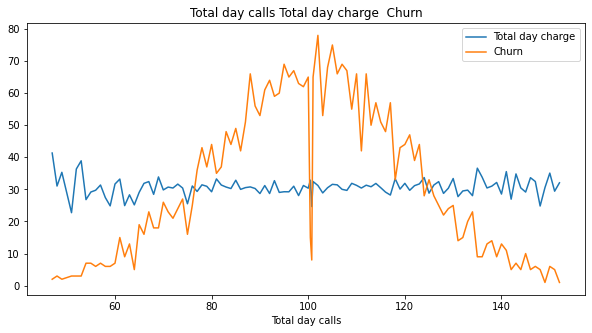

In [293]:
biv_plot('Total day calls','Total day charge')

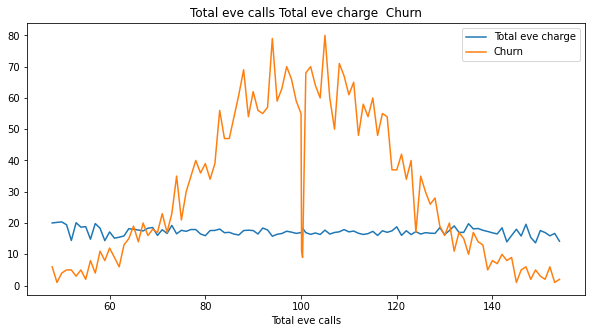

In [294]:
biv_plot('Total eve calls','Total eve charge')

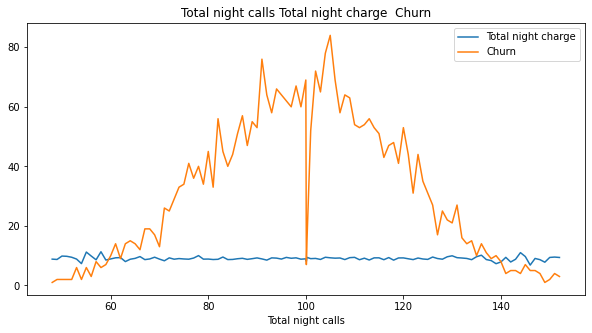

In [295]:
biv_plot('Total night calls','Total night charge')

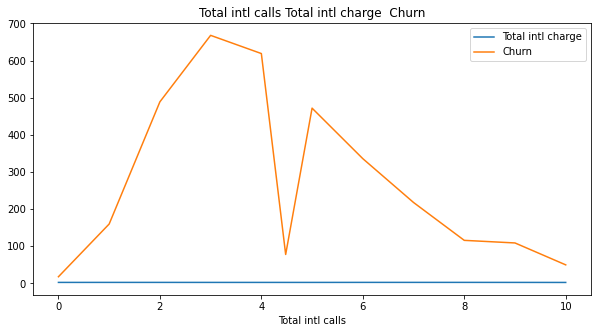

In [296]:
biv_plot('Total intl calls','Total intl charge')